<a href="https://colab.research.google.com/github/Abdullah-Elafifi/Visualizing-the-History-of-Nobel-Prize-Winners_2020/blob/main/Visualizing_the_History_of_Nobel_Prize_Winners_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Data_Frame = pd.read_csv("/content/nobel.csv")
print(Data_Frame.head())

   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  laureate_id  \
0  "in recognition of the extraordinary services ...         1/1          160   
1  "in special recognition of his poetic composit...         1/1          569   
2  "for his work on serum therapy, especially its...         1/1          293   
3                                                NaN         1/2          462   
4                                                NaN         1/2          463   

  laureate_type                     full_name  birth_date         birth_city  \
0    I

In [3]:
print(Data_Frame.columns)

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')


In [4]:
top_gender = Data_Frame['sex'].value_counts().sort_values(ascending=False).index[0]
top_country = Data_Frame["birth_country"].value_counts().sort_values(ascending=False).index[0]
print("The most common gender won the Nobel laureates is :", str(top_gender))
print("The most common birth country of Nobel laureates is :", str(top_country))

The most common gender won the Nobel laureates is : Male
The most common birth country of Nobel laureates is : United States of America


In [5]:
Data_Frame['usa_born_winner'] = Data_Frame['birth_country'] == 'United States of America'
Data_Frame['decade'] = (np.floor(Data_Frame['year'] / 10) * 10).astype(int)
prop_usa_winners = Data_Frame.groupby('decade', as_index=False)['usa_born_winner'].mean()
print(prop_usa_winners.head())

   decade  usa_born_winner
0    1900         0.017544
1    1910         0.075000
2    1920         0.074074
3    1930         0.250000
4    1940         0.302326


In [6]:
max_decade_usa = prop_usa_winners[prop_usa_winners['usa_born_winner'] == prop_usa_winners['usa_born_winner'].max()]['decade'].values[0]
print(max_decade_usa)

2000


In [7]:
Data_Frame["female winners"] = Data_Frame["sex"] =="Female"
prop_female_winners = Data_Frame.groupby(['decade', 'category'], as_index=False)['female winners'].mean()

In [8]:
max_female_decade_category = prop_female_winners[prop_female_winners['female winners'] == prop_female_winners['female winners'].max()][['decade', 'category']]
max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}
print(max_female_dict)

{2020: 'Literature'}


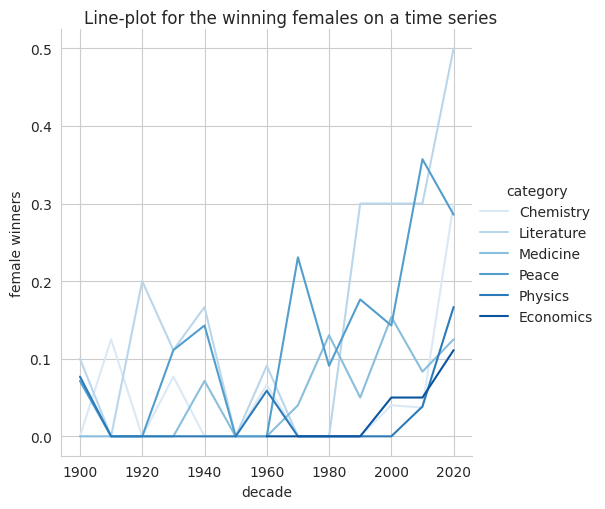

In [9]:
Data_Frame["female_winners"] = Data_Frame["sex"] =="Female"
sns.set_style("whitegrid")
sns.set_palette("Blues")
first_chart = sns.relplot(x='decade', y='female winners', hue='category', data=prop_female_winners, kind="line")
first_chart.fig.suptitle("Line-plot for the winning females on a time series", y=1.01)
plt.show()

In [10]:
nobel_women = Data_Frame[Data_Frame['female_winners']]
min_row = nobel_women[nobel_women['year'] == nobel_women['year'].min()]
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]
print(f"\n The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")


 The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.


In [11]:
counts = Data_Frame['full_name'].value_counts()
repeats = counts[counts >= 2].index
repeat_list = list(repeats)
print("\nThe repeat winners are:\n", repeat_list)


The repeat winners are:
 ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
